In [8]:
# Warmup 1: dictionary from Friday's lecture

In [1]:
person_info = { "name": "Andy", 
               "age": 17, 
               "family" : {"spouse": "Kathleen", 
                           "child1": {"name": "Sam", 
                                        "age": 16,  "sport": "soccer"}, 
                           "child2": {"name":"Stevie", 
                                      "age": 14, "sport": "fishing"}
                          }
              }
person_info

{'name': 'Andy',
 'age': 17,
 'family': {'spouse': 'Kathleen',
  'child1': {'name': 'Sam', 'age': 16, 'sport': 'soccer'},
  'child2': {'name': 'Stevie', 'age': 14, 'sport': 'fishing'}}}

In [4]:
def search_dict_recursive(target_key, some_dict):
    ''' returns the Value associated with target_key if tarket_key in any level of some_dict, 
    None otherwise'''
    for key in some_dict:
        if key == target_key:
            return some_dict[target_key]
        elif type(some_dict[key]) == dict: # recursive case
            return search_dict_recursive(target_key, some_dict[key])
    return None

print(search_dict_recursive("sport", person_info))

soccer


In [18]:
# Warmup 2:  Trace the above in Python Tutor


## Lecture 23: Functions are Objects!

As we have learned previously, all variables in Python are stored as objects.

This is also true for functions, and it gives us more power as programmers.

**Learning Objectives:**

- Define a function reference and trace code that uses function references.
- Explain the default use of sorted() on lists of tuples, and dictionaries.
- Sort a list of tuples, a list of dictionaries, or a dictionary using a function as a key.
- Use a lambda expression when sorting.

In [31]:
# function references
# try this in Python Tutor

x = [1,2,3]
y = x

def f(thing):   # what is f?  its a function but also an object
    return thing[-1]

z = f(y)  # z stores the result of a call to f

g = f  # what is g? it is a reference to an object that is a function

# TODO:  similar to line 10, store the result of a call to g

w = g(x)   # calls the same function


In [32]:
print(x)
print(f)

[1, 2, 3]
<function f at 0x7f7932640160>


### Define a function reference and trace code that uses function references.

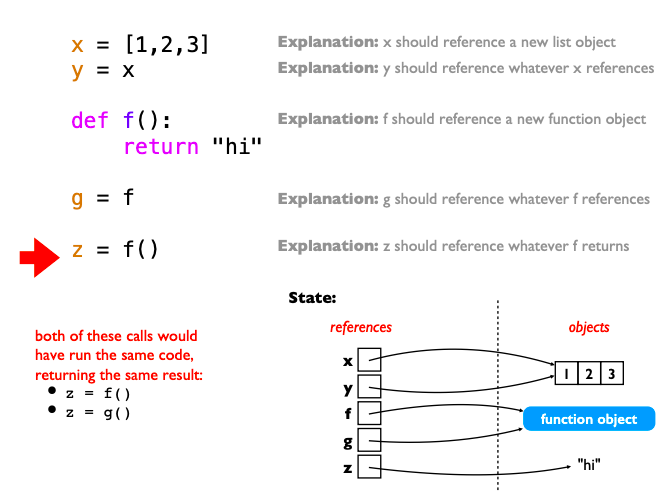

In [8]:
# function references can be passed as arguments ...Wow!

# first: try this in Python Tutor

def hi():
    print("hi")
    


# then on your own: define a function called bye

def bye():
    print("bye")

def call_n_times(f, n):
    for i in range(n):
        f()

call_n_times(hi, 3)
# then on your own:  invoke call_n_times with bye and 5 as arguments


call_n_times(bye, 5)


# Takeaway: 

hi
hi
hi
bye
bye
bye
bye
bye


### Explain the default use of sorted() on lists of tuples, and on dictionaries.


In [10]:
# first... did you know that sort/sorted takes a 2nd argument called reverse?

populations = [55, 77, 33, 99, 22]
# TODO: sort populations in reverse
sorted(populations, reverse = True)

[99, 77, 55, 33, 22]

In [11]:
# sorting part 1....how are lists of tuples sorted?
# olympic womens hockey badgers...first, last, age
# apologies for any errors

owhockey_badgers = [ ("Hillary", "Knight", 32 ), 
             ("Brianna", "Decker", 30), 
            ("Amanda", "Kessel", 30),
            ("Alex", "Cavalenni", 30), 
            ("Caroline", "Harvey", 19),
                  ("Abbey", "Roque", 24)
           ]


# call sorted on this list of tuples
sorted(owhockey_badgers)

# what did this make?  How was it sorted? 
# first item in a tuple is the default sorting behavior

[('Abbey', 'Roque', 24),
 ('Alex', 'Cavalenni', 30),
 ('Amanda', 'Kessel', 30),
 ('Brianna', 'Decker', 30),
 ('Caroline', 'Harvey', 19),
 ('Hillary', 'Knight', 32)]

In [15]:
# sorting part 2:  define a function that returns a value from a tuple
def select0(some_tuple):  # function must have exactly one parameter
    return some_tuple[0]

def select1(some_tuple):
    return some_tuple[1]

def silly_dog(some_tuple):
    return some_tuple[2]

# Test these functions on the tuple ("Andy", "Meena", "Cole")

silly_dog(("Andy", "Meena", "Cole"))


'Cole'

In [16]:
#call sorted using the key 
# sort and sorted can take a parameter named key
# key is a reference to a function!


sorted(owhockey_badgers, key = select1)

[('Alex', 'Cavalenni', 30),
 ('Brianna', 'Decker', 30),
 ('Caroline', 'Harvey', 19),
 ('Amanda', 'Kessel', 30),
 ('Hillary', 'Knight', 32),
 ('Abbey', 'Roque', 24)]

In [17]:
# sort the list of tuples based on age
sorted(owhockey_badgers, key = silly_dog)

[('Caroline', 'Harvey', 19),
 ('Abbey', 'Roque', 24),
 ('Brianna', 'Decker', 30),
 ('Amanda', 'Kessel', 30),
 ('Alex', 'Cavalenni', 30),
 ('Hillary', 'Knight', 32)]

### Power Tip:  Use Lambdas
    
Lambda expressions are a way to abstract (make a shortcut to) a function reference.

Lambda expressions removes the structure of define/name/return for the function.

The term 'lambda' comes from mathematical theory.



In [18]:
# sorting part 3....using lambdas

'''
def no_name(t):
    return t[-1]
'''

sorted(owhockey_badgers, key = lambda t : t[-1])

# read the lambda as: my no-name function has t as a parameter and returns t[-1]
# the variable 't' is like a function parameter

[('Caroline', 'Harvey', 19),
 ('Abbey', 'Roque', 24),
 ('Brianna', 'Decker', 30),
 ('Amanda', 'Kessel', 30),
 ('Alex', 'Cavalenni', 30),
 ('Hillary', 'Knight', 32)]

In [19]:
# TODO: sort the list by the length of the first name
'''
def no_name(t):
    return len(t[0])
'''

sorted(owhockey_badgers, key = lambda t : len(t[0]))


[('Alex', 'Cavalenni', 30),
 ('Abbey', 'Roque', 24),
 ('Amanda', 'Kessel', 30),
 ('Hillary', 'Knight', 32),
 ('Brianna', 'Decker', 30),
 ('Caroline', 'Harvey', 19)]

### OK, I can sort a list of tuples....what about a list of dictionaries?

In [21]:

hurricanes = [
    {"name": "C", "year": 2000, "speed": 150},
    {"name": "A", "year": 1980, "speed": 100},
    {"name": "B", "year": 1990, "speed": 250},
]

# call sorted on hurricanes and use a lambda expression to grab the year
sorted(hurricanes, key = lambda  d : d["year"], reverse=True)


[{'name': 'C', 'year': 2000, 'speed': 150},
 {'name': 'B', 'year': 1990, 'speed': 250},
 {'name': 'A', 'year': 1980, 'speed': 100}]

In [22]:
# sort hurricanes from lowest to highest speed
# for you to do on your own...see the above example

sorted(hurricanes, key = lambda  d : d['speed'])


[{'name': 'A', 'year': 1980, 'speed': 100},
 {'name': 'C', 'year': 2000, 'speed': 150},
 {'name': 'B', 'year': 1990, 'speed': 250}]

In [49]:
# on your own, sort hurricanes a different way.....


### This is all great, but what I'd really like to do is to sort dictionaries!


In [23]:
menu = { 'pie': 3.95, 
         'ala mode':1.50, 
         'donut': 1.25, 
         'cookie': 0.79, 
         'milk':1.65,
          'loaf': 5.99,
        'hot dog': 4.99}

# sorted (dict) returns a list of the keys sorted
sorted(menu)


['ala mode', 'cookie', 'donut', 'hot dog', 'loaf', 'milk', 'pie']

### We can make progress on this by using the .items() method 


In [24]:
menu.items()

dict_items([('pie', 3.95), ('ala mode', 1.5), ('donut', 1.25), ('cookie', 0.79), ('milk', 1.65), ('loaf', 5.99), ('hot dog', 4.99)])

In [25]:
# that looks like a list of tuples!

# let's sort menu.items() the same way we sorted a list of tuples
sorted(menu.items())

[('ala mode', 1.5),
 ('cookie', 0.79),
 ('donut', 1.25),
 ('hot dog', 4.99),
 ('loaf', 5.99),
 ('milk', 1.65),
 ('pie', 3.95)]

In [26]:
# now let's turn this list of tuples into a dict
# 

dict(sorted(menu.items()))

{'ala mode': 1.5,
 'cookie': 0.79,
 'donut': 1.25,
 'hot dog': 4.99,
 'loaf': 5.99,
 'milk': 1.65,
 'pie': 3.95}

In [28]:
# can you change the previous code to sort by value? 
dict(sorted(menu.items(), key = lambda t:t[1]))

{'cookie': 0.79,
 'donut': 1.25,
 'ala mode': 1.5,
 'milk': 1.65,
 'pie': 3.95,
 'hot dog': 4.99,
 'loaf': 5.99}

In [29]:
# can you sort the dictionary by the length of the key? 
dict(sorted(menu.items(), key = lambda t: len(t[0])))

{'pie': 3.95,
 'milk': 1.65,
 'loaf': 5.99,
 'donut': 1.25,
 'cookie': 0.79,
 'hot dog': 4.99,
 'ala mode': 1.5}

##  After Lecture

In [ ]:
# Practice sorting a list of tuples

# Practice sorting a list of dictionaries 

# Practice sorting a dictionary by keys

# Practice sorting a dictionary by values

